# Приложение на Hidden Markov Model

Ще използвам пакета [hmmlearn](https://github.com/hmmlearn/hmmlearn).
Документацията е на [тук](http://hmmlearn.readthedocs.io/en/stable/index.html), но описанието на алгоритъма се намира [тук](http://scikit-learn.sourceforge.net/stable/modules/hmm.html). Във втория параграф на последната връзка са описани трите начина, по които може да се ползва. Ние ще го ползваме по третия, а именно:
- Given just the observed data, estimate the model parameters.

In [86]:
import numpy as np
from hmmlearn.hmm import GaussianHMM
import warnings
warnings.filterwarnings('ignore')

## Генериране на данните
Ще генерираме синтетични данни по следния начин.
- Първите 10% са нормално разпределени с очакване 0 и дисперсия 1
- вторите 10% са нормално разпределени с очакване 1 и дисперсия 1
и т.н.

Ще ги интерпретираме като резултатите на **един** човек, който постоянно се подобрява на **един и същи** тип тест.
Скалата, която получаваме по този начин е приблизително от -2 до 12. Разбира се случайни фактори могат да понижат или резулата му в близост до горното или долното ниво. Избрали сме стандартно отклонение 1, което значи че това се очаква да се случва в около 1/3 от наблюденията.

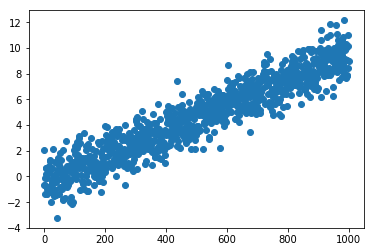

In [87]:
test_results = np.zeros((1000,1))
step = 100
for i in range(10):
    test_results[(i*step):((i+1)*step)] = np.random.normal(loc=i, scale=1, size=(step,1))
plt.scatter(range(len(test_results)), test_results)

## Трениране на модела

Дефинираме модела с 5 нива, които ще представляват оценката за прогреса на заболяването.
Очакваме модела да даде ниво с очакване около
- 0.5 на точки генерирани от 0,1
- 2.5 на точки генерирани от 2,3
- 4.5 на точки генерирани от 4,5
- 6.5 на точки генерирани от 6,7
- 8.5 на точки генерирани от 8,9

Забележете, че аргумента на fit са само резултатите test_results, но не и лейбълите, от които идват.

In [92]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=10000).fit(test_results)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...done


In [94]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Transition matrix
[[9.94961830e-001 2.89808838e-133 3.79227579e-005 5.00024685e-003
  7.38935292e-188]
 [9.35670835e-051 9.88829576e-001 1.68535198e-094 3.68872029e-019
  1.11704238e-002]
 [5.04802223e-003 7.91020083e-197 9.94951978e-001 3.09660203e-052
  1.26459575e-272]
 [6.52552887e-019 5.03403216e-003 2.07779666e-044 9.94965968e-001
  3.30832978e-043]
 [7.27081794e-096 4.84663989e-003 2.28324941e-144 4.81620766e-044
  9.95153360e-001]]

Means and vars of each hidden state
0th hidden state
mean =  [2.49634214]
var =  [1.06679781]

1th hidden state
mean =  [6.45630335]
var =  [1.03518404]

2th hidden state
mean =  [0.48558094]
var =  [1.34490814]

3th hidden state
mean =  [4.49536188]
var =  [1.18183222]

4th hidden state
mean =  [8.47558369]
var =  [1.38130708]



## Предвиждане

Нека видим как са класифицирани отделните наблюдения:

In [95]:
state_sequence = model.predict(test_results)

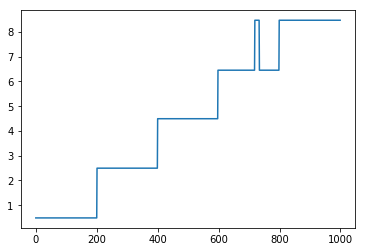

In [96]:
plt.plot(range(len(state_sequence)), model.means_[state_sequence])

Началото и края са доста добре оценени. Около наблюдение 500 има известно колебание за класа на наблюденията, но като цяло няма фрапантни грешки.

T.e. научихме, как да разделим резултатите, без да знаем, от каква дистрибуция идват. 